<a href="https://colab.research.google.com/github/antidude900/pytorch_learning/blob/main/04_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# raw_train_data = datasets.Food101(
#     root="data", # where to download data to?
#     split="train", # get training data
#     download=True, # download data if it doesn't exist on disk
#     transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors,
#                           #PIL image have a format of (h,w,c) but using transform=ToTensor() makes it of format (c,h,w)
#     target_transform=None # you can transform labels as well
# )

# # Setup testing data
# raw_test_data = datasets.Food101(
#     root="data",
#     split="test", # get test data
#     download=True,
#     transform=ToTensor()
# )

In [ ]:
img,label = raw_train_data[1000]
print(img.shape,label)
img

NameError: name 'raw_train_data' is not defined

In [ ]:
classes = ['pizza', 'steak', 'sushi']
class_names = raw_train_data.classes

# Find the indices of the selected classes
class_indices = [class_names.index(title) for title in classes]
print(class_indices)
label_mapping = {original_idx: new_idx for new_idx, original_idx in enumerate(class_indices)}

In [ ]:
class FilteredDataset(Subset):
    def __init__(self, dataset, label_mapping):
        # Create a boolean mask for the selected classes
        mask = np.isin(dataset._labels, class_indices)
        # Convert the mask to a list of indices
        filtered_indices = np.where(mask)[0]
        np.random.shuffle(filtered_indices)
        super().__init__(dataset, filtered_indices)
        self.label_mapping = label_mapping

    def __getitem__(self, idx):
        image, label = super().__getitem__(idx)
        # Remap the label using the label_mapping
        remapped_label = self.label_mapping[label]
        return image, remapped_label

In [ ]:
# Create the filtered dataset with dynamic label remapping
train_data = FilteredDataset(raw_train_data,label_mapping)
test_data = FilteredDataset(raw_test_data, label_mapping)

# Now `filtered_dataset` contains only pizza, sushi, and steak samples
print(f"Total samples in train dataset: {len(train_data)}")
print(f"Total samples in test dataset: {len(test_data)}")

In [ ]:
image, label = train_data[5]
print(label)
plt.imshow(image.permute(1,2,0))

In [ ]:
pizza=0
sushi = 0
steak = 0
for i in range(len(train_data)):
  img,lbl=train_data[i]
  if lbl == 1:
    pizza+=1
  elif lbl == 2:
      sushi+=1
  else:
      steak+=1
print(f"No of pizzas: {pizza}, sushis: {sushi}, steak: {steak}")


In [ ]:
# Create a figure to display the images
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4  # 2 rows and 5 columns for 10 images

# Loop to display 10 random samples
for i in range(1, rows * cols + 1):
    # Get a random index from the filtered dataset
    random_idx = torch.randint(0, len(train_data), size=[1]).item()

    # Get the image and label from the filtered dataset
    img, label = train_data[random_idx]

    # Add a subplot for the current image
    fig.add_subplot(rows, cols, i)

    # Display the image
    # Note: Food101 images are in RGB format, so we permute the dimensions from (C, H, W) to (H, W, C)
    plt.imshow(img.permute(1, 2, 0))  # Permute for matplotlib compatibility

    # Set the title to the class name
    plt.title(classes[label])  # Use filtered_dataset.classes to get the class name

    # Hide axis
    plt.axis(False)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists!")
else:
  print(f"{image_path} directory doesent exists,creating one...")
  image_path.mkdir(parents = True,exist_ok = True)

with open(data_path / "pizza_steak_sushi.zip","wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza,steak and sushi data...")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip","r") as zip_ref:
  print("Unzipping...")
  zip_ref.extractall(image_path)



data/pizza_steak_sushi directory doesent exists,creating one...
Unzipping...


In [ ]:
from pathlib import Path
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

image_path

PosixPath('data/pizza_steak_sushi')

In [ ]:
import random
from PIL import Image

random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))

image_path_list

[PosixPath('data/pizza_steak_sushi/train/steak/2013535.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/231296.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2017387.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/100135.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/482022.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1736968.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2163079.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1225762.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2881783.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1961025.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/239025.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/937133.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/922752.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3074367.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2287136.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2648423.jpg'),
 PosixPath('da

In [ ]:
from PIL import Image
from IPython.display import display

In [ ]:
img = Image.open(image_path_list[1])
display(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x382 at 0x7F87EFFFCA90>


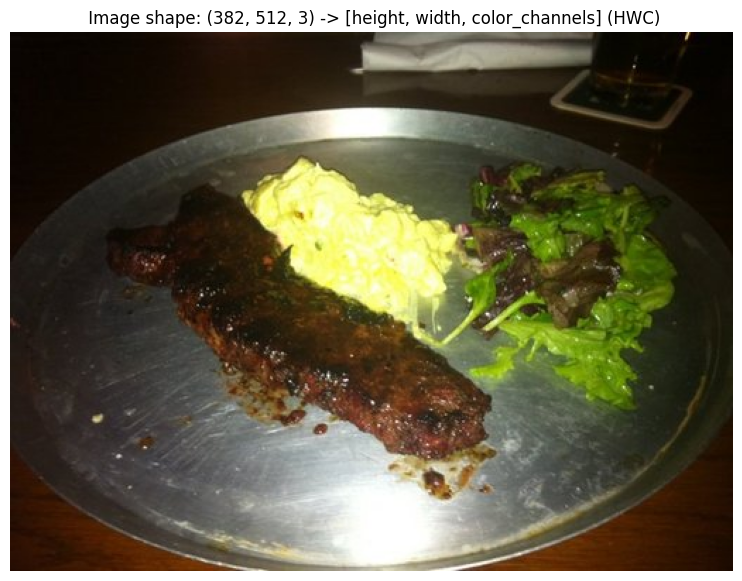

In [ ]:
img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f" Image shape: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis(False);

array([[[11,  6,  3],
        [11,  6,  3],
        [11,  6,  3],
        ...,
        [ 3,  2,  0],
        [ 3,  2,  0],
        [ 2,  1,  0]],

       [[ 9,  4,  1],
        [ 9,  4,  1],
        [ 9,  4,  1],
        ...,
        [ 3,  2,  0],
        [ 3,  2,  0],
        [ 2,  1,  0]],

       [[10,  5,  2],
        [10,  5,  2],
        [10,  5,  2],
        ...,
        [ 4,  3,  0],
        [ 3,  2,  0],
        [ 2,  1,  0]],

       ...,

       [[38, 14,  4],
        [38, 14,  4],
        [39, 15,  5],
        ...,
        [26,  9,  0],
        [26,  9,  0],
        [27, 10,  0]],

       [[37, 13,  3],
        [37, 13,  3],
        [37, 13,  3],
        ...,
        [26,  9,  0],
        [26,  9,  0],
        [26,  9,  0]],

       [[34, 10,  0],
        [34, 10,  0],
        [35, 11,  1],
        ...,
        [27, 10,  0],
        [27, 10,  0],
        [27, 10,  0]]], dtype=uint8)
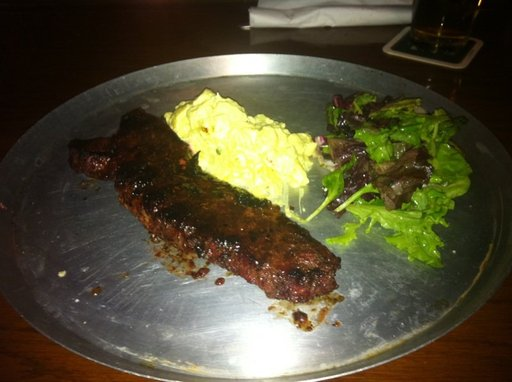

In [ ]:
img_as_array

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),

    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [ ]:
def plot_transformed_images(image_paths:list,transform,n=3,seed=None):
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths,k=n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize:{np.asarray(f).shape}")
      ax[0].axis(False)

      t = transform(f)
      ax[1].imshow(t.permute(1,2,0))
      ax[1].set_title(f"Transformed\nSize:{t.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class:{image_path.parent.stem}",fontsize=16)

In [ ]:
plot_transformed_images(image_path_list,data_transform)display(img)2
15R482 0-><+328]678=

SyntaxError: invalid decimal literal (<ipython-input-39-737f2d30f34d>, line 2)

In [ ]:
|train_dir = image_path/"train"
test_dir = image_path/"test"

from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,transform = data_transform)
test_data = datasets.ImageFolder(root = test_dir,transform = data_transform)

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = 1,
                              shuffle = True)

test_dataloader = DataLoader(dataset= train_data,
                            batch_size = BATCH_SIZE,
                            num_workers = 1,
                            shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f87f03d74d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f87f1043450>)